gap - R^2: 0.844538838025911, RMSE: 0.01868539031190757, MAE: 0.013855127567356825


C:\Users\Priyanka\AppData\Local\Temp\ipykernel_37404\203934109.py:79: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', color="red")


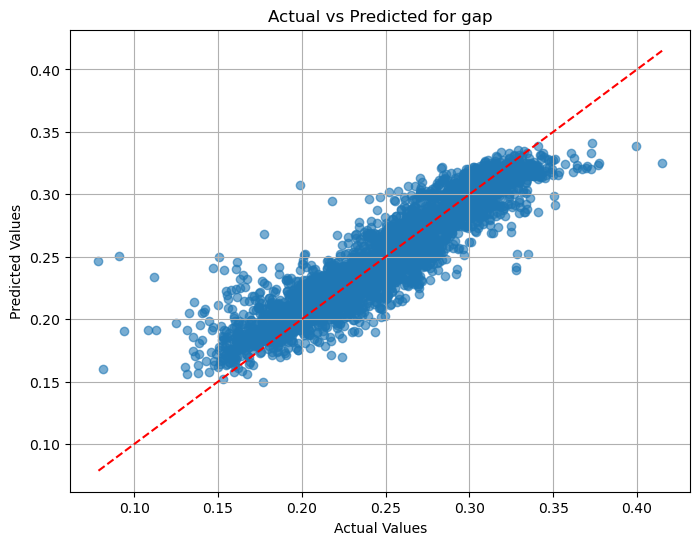

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Descriptors, AllChem
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor  # Import XGBoost Regressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Load the data
#current_directory = os.getcwd()
data_path = "E:\Dream\Dream Research\IDDD Project\Work_December\Data.xlsx"
data = pd.read_excel(data_path)

# Initialize a list to store molecular descriptors and fingerprints
features = []

# Function to compute molecular descriptors
def compute_descriptors(mol):
    descriptors = {
        'MolWt': Descriptors.MolWt(mol),
        'NumAtoms': mol.GetNumAtoms(),
        'NumBonds': mol.GetNumBonds(),
        'NumRotatableBonds': Descriptors.NumRotatableBonds(mol),
        'NumHAcceptors': Descriptors.NumHAcceptors(mol),
        'NumHDonors': Descriptors.NumHDonors(mol)
    }
    return descriptors

# Iterate through the dataset
for smiles in data['SMILES_1']:
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        descriptors = compute_descriptors(mol)
        # Compute Morgan fingerprint as a vector representation
        fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)
        fingerprint_array = list(fingerprint)
        # Combine descriptors and fingerprints
        features.append({**descriptors, **{'Fingerprint': fingerprint_array}})
    else:
        # Handle invalid SMILES strings
        features.append(None)

# Create a DataFrame for the features
features_df = pd.DataFrame(features)

# Extract fingerprint vectors and convert to a 2D array
fingerprint_vectors = np.array(features_df['Fingerprint'].tolist())

# Initialize a dictionary to store metrics
results = {}

# Iterate through each target property to predict
for target in ['gap']:
    # Select the target property and prepare the dataset
    Y = data[target]

    # Split the data into training and testing sets
    X_train, X_test, Y_train, Y_test = train_test_split(fingerprint_vectors, Y, test_size=0.2, random_state=42)

    # Train an XGBoost Regressor
    model = XGBRegressor(random_state=42, n_estimators=100, max_depth=6, learning_rate=0.1)
    model.fit(X_train, Y_train)

    # Predict on the test set
    Y_pred = model.predict(X_test)

    # Calculate metrics
    r2 = r2_score(Y_test, Y_pred)
    rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
    mae = mean_absolute_error(Y_test, Y_pred)
    results[target] = {"R^2": r2, "RMSE": rmse, "MAE": mae}
    print(f"{target} - R^2: {r2}, RMSE: {rmse}, MAE: {mae}")

    # Plot actual vs predicted values
    plt.figure(figsize=(8, 6))
    plt.scatter(Y_test, Y_pred, alpha=0.6)
    plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', color="red")
    plt.title(f"Actual vs Predicted for {target}")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.grid()
    plt.show()


Test R^2: 0.4923607044581474
Test RMSE: 0.04539895645504505


C:\Users\Priyanka\AppData\Local\Temp\ipykernel_37404\867589180.py:82: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', color="red")


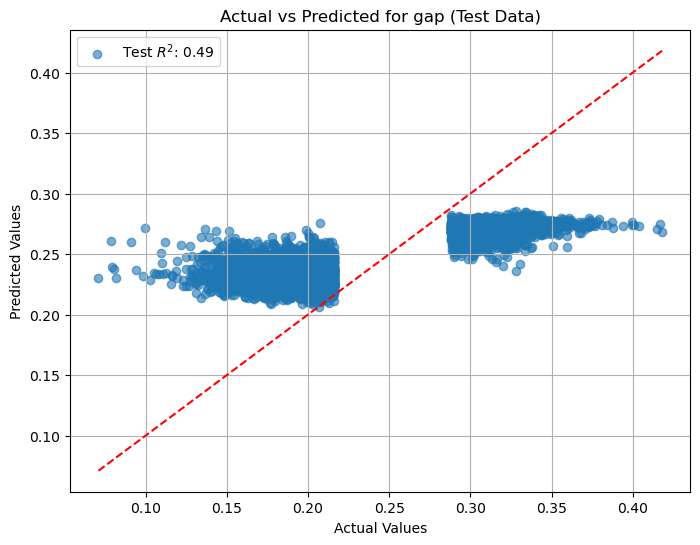

Model training and evaluation completed.


In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Descriptors, AllChem
from xgboost import XGBRegressor  # Import XGBoost Regressor
from sklearn.metrics import r2_score, mean_squared_error

# Load the data
data_path =  "E:\Dream\Dream Research\IDDD Project\Work_December\Data.xlsx"
data = pd.read_excel(data_path)

# Initialize a list to store molecular descriptors and fingerprints
features = []

# Function to compute molecular descriptors
def compute_descriptors(mol):
    descriptors = {
        'MolWt': Descriptors.MolWt(mol),
        'NumAtoms': mol.GetNumAtoms(),
        'NumBonds': mol.GetNumBonds(),
        'NumRotatableBonds': Descriptors.NumRotatableBonds(mol),
        'NumHAcceptors': Descriptors.NumHAcceptors(mol),
        'NumHDonors': Descriptors.NumHDonors(mol)
    }
    return descriptors

# Iterate through the dataset
for smiles in data['SMILES_1']:
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        descriptors = compute_descriptors(mol)
        # Compute Morgan fingerprint as a vector representation
        fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)
        fingerprint_array = list(fingerprint)
        # Combine descriptors and fingerprints
        features.append({**descriptors, **{'Fingerprint': fingerprint_array}})
    else:
        # Handle invalid SMILES strings
        features.append(None)

# Create a DataFrame for the features
features_df = pd.DataFrame(features)

# Extract fingerprint vectors and convert to a 2D array
fingerprint_vectors = np.array(features_df['Fingerprint'].tolist())

# Select the target property
target = 'gap'
Y = data[target]

# Calculate percentiles
q25, q75 = np.percentile(Y, [25, 75])

# Split data into training and testing sets based on percentiles
train_indices = (Y > q25) & (Y <= q75)
test_indices = (Y <= q25) | (Y > q75)

X_train = fingerprint_vectors[train_indices]
Y_train = Y[train_indices]
X_test = fingerprint_vectors[test_indices]
Y_test = Y[test_indices]

# Train an XGBoost Regressor
model = XGBRegressor(random_state=42, n_estimators=100, max_depth=6, learning_rate=0.1)
model.fit(X_train, Y_train)

# Predict on the test set
Y_test_pred = model.predict(X_test)

# Calculate metrics for test data
r2_test = r2_score(Y_test, Y_test_pred)
rmse_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))

print(f"Test R^2: {r2_test}")
print(f"Test RMSE: {rmse_test}")

# Plot Actual vs Predicted for test data
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_test_pred, alpha=0.6, label=f'Test $R^2$: {r2_test:.2f}')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', color="red")
plt.title(f"Actual vs Predicted for {target} (Test Data)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid()
plt.show()

print("Model training and evaluation completed.")



Test R^2: 0.5111382469909036
Test RMSE: 0.04470840342598541


C:\Users\Priyanka\AppData\Local\Temp\ipykernel_37404\1872893653.py:82: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', color="red")


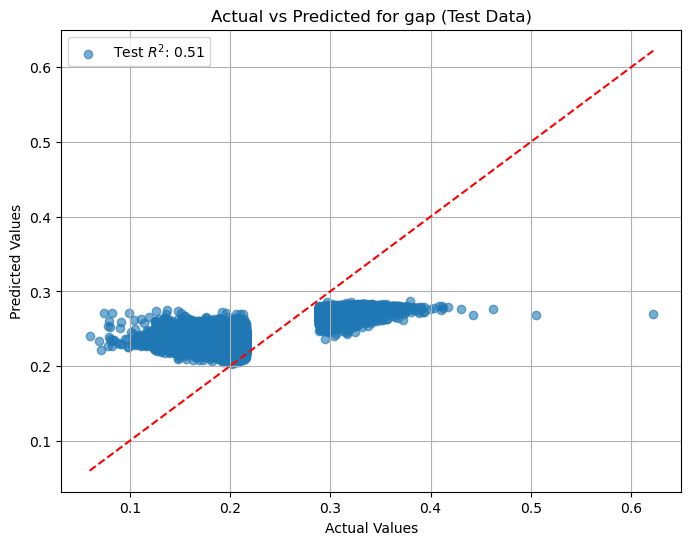

Model training and evaluation completed.


In [7]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Descriptors, AllChem
from xgboost import XGBRegressor  # Import XGBoost Regressor
from sklearn.metrics import r2_score, mean_squared_error

# Load the data
data_path =  "E:\Dream\Dream Research\IDDD Project\Work_December\extracted_50000.xlsx"
data = pd.read_excel(data_path)

# Initialize a list to store molecular descriptors and fingerprints
features = []

# Function to compute molecular descriptors
def compute_descriptors(mol):
    descriptors = {
        'MolWt': Descriptors.MolWt(mol),
        'NumAtoms': mol.GetNumAtoms(),
        'NumBonds': mol.GetNumBonds(),
        'NumRotatableBonds': Descriptors.NumRotatableBonds(mol),
        'NumHAcceptors': Descriptors.NumHAcceptors(mol),
        'NumHDonors': Descriptors.NumHDonors(mol)
    }
    return descriptors

# Iterate through the dataset
for smiles in data['SMILES_1']:
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        descriptors = compute_descriptors(mol)
        # Compute Morgan fingerprint as a vector representation
        fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)
        fingerprint_array = list(fingerprint)
        # Combine descriptors and fingerprints
        features.append({**descriptors, **{'Fingerprint': fingerprint_array}})
    else:
        # Handle invalid SMILES strings
        features.append(None)

# Create a DataFrame for the features
features_df = pd.DataFrame(features)

# Extract fingerprint vectors and convert to a 2D array
fingerprint_vectors = np.array(features_df['Fingerprint'].tolist())

# Select the target property
target = 'gap'
Y = data[target]

# Calculate percentiles
q25, q75 = np.percentile(Y, [25, 75])

# Split data into training and testing sets based on percentiles
train_indices = (Y > q25) & (Y <= q75)
test_indices = (Y <= q25) | (Y > q75)

X_train = fingerprint_vectors[train_indices]
Y_train = Y[train_indices]
X_test = fingerprint_vectors[test_indices]
Y_test = Y[test_indices]

# Train an XGBoost Regressor
model = XGBRegressor(random_state=42, n_estimators=100, max_depth=6, learning_rate=0.1)
model.fit(X_train, Y_train)

# Predict on the test set
Y_test_pred = model.predict(X_test)

# Calculate metrics for test data
r2_test = r2_score(Y_test, Y_test_pred)
rmse_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))

print(f"Test R^2: {r2_test}")
print(f"Test RMSE: {rmse_test}")

# Plot Actual vs Predicted for test data
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_test_pred, alpha=0.6, label=f'Test $R^2$: {r2_test:.2f}')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', color="red")
plt.title(f"Actual vs Predicted for {target} (Test Data)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid()
plt.show()

print("Model training and evaluation completed.")



Epoch 1/100
251/251 [==============================] - 5s 14ms/step - loss: 0.0033 - mae: 0.0406 - val_loss: 0.0012 - val_mae: 0.0298
Epoch 2/100
251/251 [==============================] - 4s 14ms/step - loss: 8.8976e-04 - mae: 0.0236 - val_loss: 5.8241e-04 - val_mae: 0.0198
Epoch 3/100
251/251 [==============================] - 4s 15ms/step - loss: 5.0551e-04 - mae: 0.0178 - val_loss: 4.7619e-04 - val_mae: 0.0178
Epoch 4/100
251/251 [==============================] - 5s 21ms/step - loss: 3.9765e-04 - mae: 0.0158 - val_loss: 3.0445e-04 - val_mae: 0.0142
Epoch 5/100
251/251 [==============================] - 4s 15ms/step - loss: 3.1763e-04 - mae: 0.0141 - val_loss: 2.5724e-04 - val_mae: 0.0130
Epoch 6/100
251/251 [==============================] - 5s 18ms/step - loss: 2.6070e-04 - mae: 0.0127 - val_loss: 2.8821e-04 - val_mae: 0.0137
Epoch 7/100
251/251 [==============================] - 4s 15ms/step - loss: 2.1276e-04 - mae: 0.0115 - val_loss: 2.9843e-04 - val_mae: 0.0139
Epoch 8/100
25

C:\Users\Priyanka\AppData\Local\Temp\ipykernel_37404\2256000246.py:112: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', color="red")


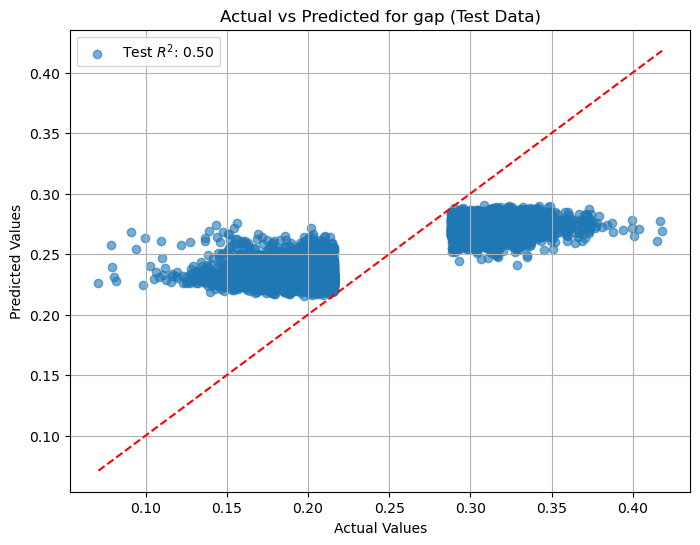

Model training and evaluation completed.


In [6]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Descriptors, AllChem
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load the data
data_path =  "E:\Dream\Dream Research\IDDD Project\Work_December\Data.xlsx"
data = pd.read_excel(data_path)

# Initialize a list to store molecular descriptors and fingerprints
features = []

# Function to compute molecular descriptors
def compute_descriptors(mol):
    descriptors = {
        'MolWt': Descriptors.MolWt(mol),
        'NumAtoms': mol.GetNumAtoms(),
        'NumBonds': mol.GetNumBonds(),
        'NumRotatableBonds': Descriptors.NumRotatableBonds(mol),
        'NumHAcceptors': Descriptors.NumHAcceptors(mol),
        'NumHDonors': Descriptors.NumHDonors(mol)
    }
    return descriptors

# Iterate through the dataset
for smiles in data['SMILES_1']:
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        descriptors = compute_descriptors(mol)
        # Compute Morgan fingerprint as a vector representation
        fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)
        fingerprint_array = list(fingerprint)
        # Combine descriptors and fingerprints
        features.append({**descriptors, **{'Fingerprint': fingerprint_array}})
    else:
        # Handle invalid SMILES strings
        features.append(None)

# Create a DataFrame for the features
features_df = pd.DataFrame(features)

# Extract fingerprint vectors and convert to a 2D array
fingerprint_vectors = np.array(features_df['Fingerprint'].tolist())

# Select the target property
target = 'gap'
Y = data[target]

# Calculate percentiles
q25, q75 = np.percentile(Y, [25, 75])

# Split data into training and testing sets based on percentiles
train_indices = (Y > q25) & (Y <= q75)
test_indices = (Y <= q25) | (Y > q75)

X_train = fingerprint_vectors[train_indices]
Y_train = Y[train_indices]
X_test = fingerprint_vectors[test_indices]
Y_test = Y[test_indices]

# Normalize the data (DNNs benefit from normalized inputs)
X_train = X_train / np.max(X_train, axis=1, keepdims=True)
X_test = X_test / np.max(X_test, axis=1, keepdims=True)

# Define the DNN model
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')  # Output layer for regression
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, Y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Predict on the test set
Y_test_pred = model.predict(X_test).flatten()

# Calculate metrics for test data
r2_test = r2_score(Y_test, Y_test_pred)
rmse_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))

print(f"Test R^2: {r2_test}")
print(f"Test RMSE: {rmse_test}")

# Plot Actual vs Predicted for test data
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_test_pred, alpha=0.6, label=f'Test $R^2$: {r2_test:.2f}')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', color="red")
plt.title(f"Actual vs Predicted for {target} (Test Data)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid()
plt.show()

print("Model training and evaluation completed.")


Test R^2: 0.4923607044581474
Test RMSE: 0.04539895645504505


C:\Users\Priyanka\AppData\Local\Temp\ipykernel_37404\2880584684.py:86: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', color="red", label="Perfect Fit Line")


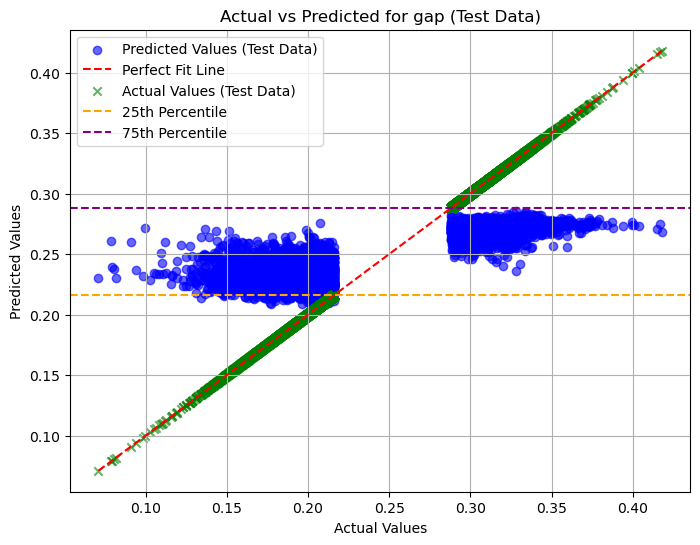

Model training and evaluation completed.


In [8]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Descriptors, AllChem
from xgboost import XGBRegressor  # Import XGBoost Regressor
from sklearn.metrics import r2_score, mean_squared_error

# Load the data
data_path = "E:\\Dream\\Dream Research\\IDDD Project\\Work_December\\Data.xlsx"
data = pd.read_excel(data_path)

# Initialize a list to store molecular descriptors and fingerprints
features = []

# Function to compute molecular descriptors
def compute_descriptors(mol):
    descriptors = {
        'MolWt': Descriptors.MolWt(mol),
        'NumAtoms': mol.GetNumAtoms(),
        'NumBonds': mol.GetNumBonds(),
        'NumRotatableBonds': Descriptors.NumRotatableBonds(mol),
        'NumHAcceptors': Descriptors.NumHAcceptors(mol),
        'NumHDonors': Descriptors.NumHDonors(mol)
    }
    return descriptors

# Iterate through the dataset
for smiles in data['SMILES_1']:
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        descriptors = compute_descriptors(mol)
        # Compute Morgan fingerprint as a vector representation
        fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)
        fingerprint_array = list(fingerprint)
        # Combine descriptors and fingerprints
        features.append({**descriptors, **{'Fingerprint': fingerprint_array}})
    else:
        # Handle invalid SMILES strings
        features.append(None)

# Create a DataFrame for the features
features_df = pd.DataFrame(features)

# Extract fingerprint vectors and convert to a 2D array
fingerprint_vectors = np.array(features_df['Fingerprint'].tolist())

# Select the target property
target = 'gap'
Y = data[target]

# Calculate percentiles
q25, q75 = np.percentile(Y, [25, 75])

# Split data into training and testing sets based on percentiles
train_indices = (Y > q25) & (Y <= q75)
test_indices = (Y <= q25) | (Y > q75)

X_train = fingerprint_vectors[train_indices]
Y_train = Y[train_indices]
X_test = fingerprint_vectors[test_indices]
Y_test = Y[test_indices]

# Train an XGBoost Regressor
model = XGBRegressor(random_state=42, n_estimators=100, max_depth=6, learning_rate=0.1)
model.fit(X_train, Y_train)

# Predict on the test set
Y_test_pred = model.predict(X_test)

# Calculate metrics for test data
r2_test = r2_score(Y_test, Y_test_pred)
rmse_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))

print(f"Test R^2: {r2_test}")
print(f"Test RMSE: {rmse_test}")

# Plot Actual vs Predicted for test data
plt.figure(figsize=(8, 6))

# Scatter plot for predicted values vs actual values
plt.scatter(Y_test, Y_test_pred, alpha=0.6, label='Predicted Values (Test Data)', color='blue')

# Overlay line showing perfect predictions
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', color="red", label="Perfect Fit Line")

# Scatter plot for actual test data points
plt.scatter(Y_test, Y_test, alpha=0.6, label='Actual Values (Test Data)', color='green', marker='x')

# Highlighting actual test data range for clarity
plt.axhline(y=q25, color='orange', linestyle='--', label='25th Percentile')
plt.axhline(y=q75, color='purple', linestyle='--', label='75th Percentile')

plt.title(f"Actual vs Predicted for {target} (Test Data)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid()
plt.show()

print("Model training and evaluation completed.")


Test R^2: 0.5178931384042147
Test RMSE: 0.04428043032388507


C:\Users\Priyanka\AppData\Local\Temp\ipykernel_37404\3343195236.py:86: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', color="red", label="Perfect Fit Line")


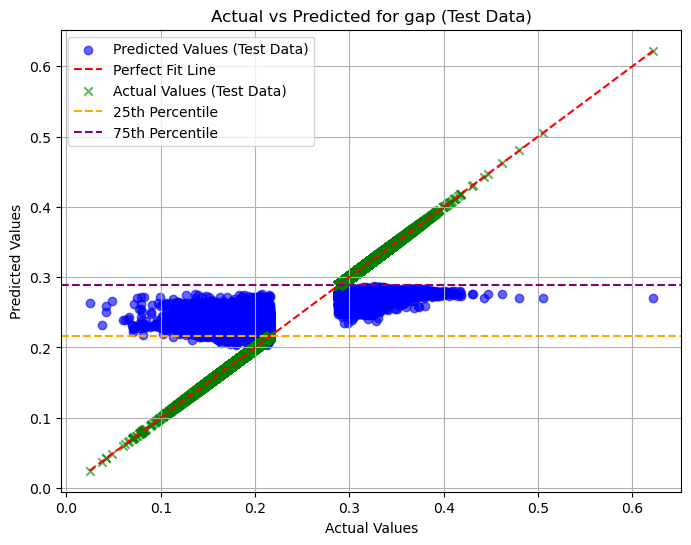

Model training and evaluation completed.


In [9]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Descriptors, AllChem
from xgboost import XGBRegressor  # Import XGBoost Regressor
from sklearn.metrics import r2_score, mean_squared_error

# Load the data
data_path = "E:\\Dream\\Dream Research\\IDDD Project\\Work_December\\entire_data.xlsx"
data = pd.read_excel(data_path)

# Initialize a list to store molecular descriptors and fingerprints
features = []

# Function to compute molecular descriptors
def compute_descriptors(mol):
    descriptors = {
        'MolWt': Descriptors.MolWt(mol),
        'NumAtoms': mol.GetNumAtoms(),
        'NumBonds': mol.GetNumBonds(),
        'NumRotatableBonds': Descriptors.NumRotatableBonds(mol),
        'NumHAcceptors': Descriptors.NumHAcceptors(mol),
        'NumHDonors': Descriptors.NumHDonors(mol)
    }
    return descriptors

# Iterate through the dataset
for smiles in data['SMILES_1']:
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        descriptors = compute_descriptors(mol)
        # Compute Morgan fingerprint as a vector representation
        fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)
        fingerprint_array = list(fingerprint)
        # Combine descriptors and fingerprints
        features.append({**descriptors, **{'Fingerprint': fingerprint_array}})
    else:
        # Handle invalid SMILES strings
        features.append(None)

# Create a DataFrame for the features
features_df = pd.DataFrame(features)

# Extract fingerprint vectors and convert to a 2D array
fingerprint_vectors = np.array(features_df['Fingerprint'].tolist())

# Select the target property
target = 'gap'
Y = data[target]

# Calculate percentiles
q25, q75 = np.percentile(Y, [25, 75])

# Split data into training and testing sets based on percentiles
train_indices = (Y > q25) & (Y <= q75)
test_indices = (Y <= q25) | (Y > q75)

X_train = fingerprint_vectors[train_indices]
Y_train = Y[train_indices]
X_test = fingerprint_vectors[test_indices]
Y_test = Y[test_indices]

# Train an XGBoost Regressor
model = XGBRegressor(random_state=42, n_estimators=100, max_depth=6, learning_rate=0.1)
model.fit(X_train, Y_train)

# Predict on the test set
Y_test_pred = model.predict(X_test)

# Calculate metrics for test data
r2_test = r2_score(Y_test, Y_test_pred)
rmse_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))

print(f"Test R^2: {r2_test}")
print(f"Test RMSE: {rmse_test}")

# Plot Actual vs Predicted for test data
plt.figure(figsize=(8, 6))

# Scatter plot for predicted values vs actual values
plt.scatter(Y_test, Y_test_pred, alpha=0.6, label='Predicted Values (Test Data)', color='blue')

# Overlay line showing perfect predictions
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', color="red", label="Perfect Fit Line")

# Scatter plot for actual test data points
plt.scatter(Y_test, Y_test, alpha=0.6, label='Actual Values (Test Data)', color='green', marker='x')

# Highlighting actual test data range for clarity
plt.axhline(y=q25, color='orange', linestyle='--', label='25th Percentile')
plt.axhline(y=q75, color='purple', linestyle='--', label='75th Percentile')

plt.title(f"Actual vs Predicted for {target} (Test Data)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid()
plt.show()

print("Model training and evaluation completed.")


Test R^2: 0.3713309123782276
Test RMSE: 0.04948738562450476


C:\Users\Priyanka\AppData\Local\Temp\ipykernel_37404\2612051191.py:86: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', color="red", label="Perfect Fit Line")


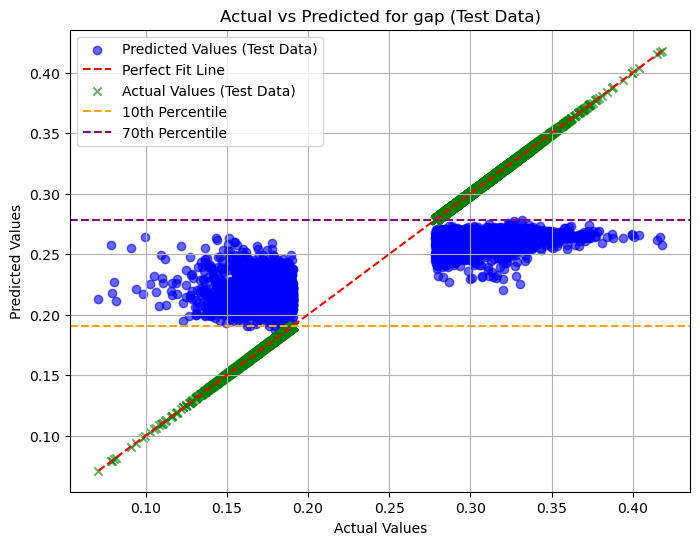

Model training and evaluation completed.


In [10]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Descriptors, AllChem
from xgboost import XGBRegressor  # Import XGBoost Regressor
from sklearn.metrics import r2_score, mean_squared_error

# Load the data
data_path = "E:\\Dream\\Dream Research\\IDDD Project\\Work_December\\Data.xlsx"
data = pd.read_excel(data_path)

# Initialize a list to store molecular descriptors and fingerprints
features = []

# Function to compute molecular descriptors
def compute_descriptors(mol):
    descriptors = {
        'MolWt': Descriptors.MolWt(mol),
        'NumAtoms': mol.GetNumAtoms(),
        'NumBonds': mol.GetNumBonds(),
        'NumRotatableBonds': Descriptors.NumRotatableBonds(mol),
        'NumHAcceptors': Descriptors.NumHAcceptors(mol),
        'NumHDonors': Descriptors.NumHDonors(mol)
    }
    return descriptors

# Iterate through the dataset
for smiles in data['SMILES_1']:
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        descriptors = compute_descriptors(mol)
        # Compute Morgan fingerprint as a vector representation
        fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)
        fingerprint_array = list(fingerprint)
        # Combine descriptors and fingerprints
        features.append({**descriptors, **{'Fingerprint': fingerprint_array}})
    else:
        # Handle invalid SMILES strings
        features.append(None)

# Create a DataFrame for the features
features_df = pd.DataFrame(features)

# Extract fingerprint vectors and convert to a 2D array
fingerprint_vectors = np.array(features_df['Fingerprint'].tolist())

# Select the target property
target = 'gap'
Y = data[target]

# Calculate percentiles
q10, q70 = np.percentile(Y, [10, 70])

# Split data into training and testing sets based on percentiles
train_indices = (Y > q10) & (Y <= q70)
test_indices = (Y <= q10) | (Y > q70)

X_train = fingerprint_vectors[train_indices]
Y_train = Y[train_indices]
X_test = fingerprint_vectors[test_indices]
Y_test = Y[test_indices]

# Train an XGBoost Regressor
model = XGBRegressor(random_state=42, n_estimators=100, max_depth=6, learning_rate=0.1)
model.fit(X_train, Y_train)

# Predict on the test set
Y_test_pred = model.predict(X_test)

# Calculate metrics for test data
r2_test = r2_score(Y_test, Y_test_pred)
rmse_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))

print(f"Test R^2: {r2_test}")
print(f"Test RMSE: {rmse_test}")

# Plot Actual vs Predicted for test data
plt.figure(figsize=(8, 6))

# Scatter plot for predicted values vs actual values
plt.scatter(Y_test, Y_test_pred, alpha=0.6, label='Predicted Values (Test Data)', color='blue')

# Overlay line showing perfect predictions
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', color="red", label="Perfect Fit Line")

# Scatter plot for actual test data points
plt.scatter(Y_test, Y_test, alpha=0.6, label='Actual Values (Test Data)', color='green', marker='x')

# Highlighting actual test data range for clarity
plt.axhline(y=q10, color='orange', linestyle='--', label='10th Percentile')
plt.axhline(y=q70, color='purple', linestyle='--', label='70th Percentile')

plt.title(f"Actual vs Predicted for {target} (Test Data)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid()
plt.show()

print("Model training and evaluation completed.")


Test R^2: 0.7281308283122192
Test RMSE: 0.04219494215093124


C:\Users\Priyanka\AppData\Local\Temp\ipykernel_37404\2868202276.py:86: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', color="red", label="Perfect Fit Line")


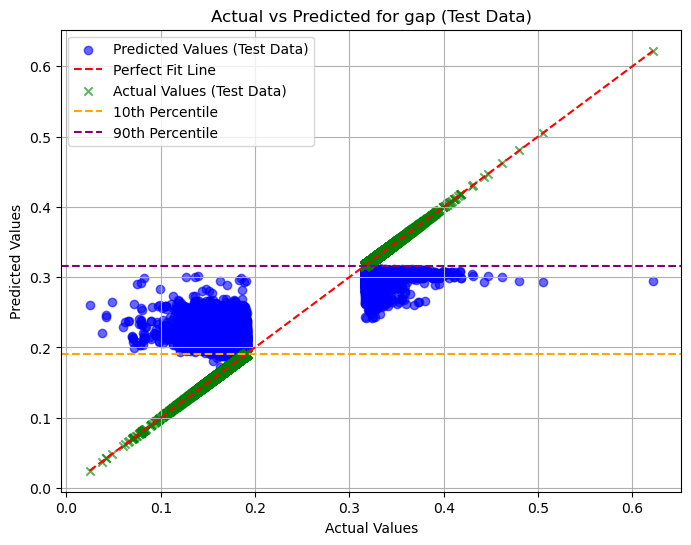

Model training and evaluation completed.


In [12]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Descriptors, AllChem
from xgboost import XGBRegressor  # Import XGBoost Regressor
from sklearn.metrics import r2_score, mean_squared_error

# Load the data
data_path = "E:\\Dream\\Dream Research\\IDDD Project\\Work_December\\entire_data.xlsx"
data = pd.read_excel(data_path)

# Initialize a list to store molecular descriptors and fingerprints
features = []

# Function to compute molecular descriptors
def compute_descriptors(mol):
    descriptors = {
        'MolWt': Descriptors.MolWt(mol),
        'NumAtoms': mol.GetNumAtoms(),
        'NumBonds': mol.GetNumBonds(),
        'NumRotatableBonds': Descriptors.NumRotatableBonds(mol),
        'NumHAcceptors': Descriptors.NumHAcceptors(mol),
        'NumHDonors': Descriptors.NumHDonors(mol)
    }
    return descriptors

# Iterate through the dataset
for smiles in data['SMILES_1']:
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        descriptors = compute_descriptors(mol)
        # Compute Morgan fingerprint as a vector representation
        fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)
        fingerprint_array = list(fingerprint)
        # Combine descriptors and fingerprints
        features.append({**descriptors, **{'Fingerprint': fingerprint_array}})
    else:
        # Handle invalid SMILES strings
        features.append(None)

# Create a DataFrame for the features
features_df = pd.DataFrame(features)

# Extract fingerprint vectors and convert to a 2D array
fingerprint_vectors = np.array(features_df['Fingerprint'].tolist())

# Select the target property
target = 'gap'
Y = data[target]

# Calculate percentiles
q10, q90 = np.percentile(Y, [10, 90])

# Split data into training and testing sets based on percentiles
train_indices = (Y > q10) & (Y <= q90)
test_indices = (Y <= q10) | (Y > q90)

X_train = fingerprint_vectors[train_indices]
Y_train = Y[train_indices]
X_test = fingerprint_vectors[test_indices]
Y_test = Y[test_indices]

# Train an XGBoost Regressor
model = XGBRegressor(random_state=42, n_estimators=100, max_depth=6, learning_rate=0.1)
model.fit(X_train, Y_train)

# Predict on the test set
Y_test_pred = model.predict(X_test)

# Calculate metrics for test data
r2_test = r2_score(Y_test, Y_test_pred)
rmse_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))

print(f"Test R^2: {r2_test}")
print(f"Test RMSE: {rmse_test}")

# Plot Actual vs Predicted for test data
plt.figure(figsize=(8, 6))

# Scatter plot for predicted values vs actual values
plt.scatter(Y_test, Y_test_pred, alpha=0.6, label='Predicted Values (Test Data)', color='blue')

# Overlay line showing perfect predictions
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', color="red", label="Perfect Fit Line")

# Scatter plot for actual test data points
plt.scatter(Y_test, Y_test, alpha=0.6, label='Actual Values (Test Data)', color='green', marker='x')

# Highlighting actual test data range for clarity
plt.axhline(y=q10, color='orange', linestyle='--', label='10th Percentile')
plt.axhline(y=q90, color='purple', linestyle='--', label='90th Percentile')

plt.title(f"Actual vs Predicted for {target} (Test Data)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid()
plt.show()

print("Model training and evaluation completed.")


Test R^2: 0.7249116400139681
Test RMSE: 0.04236930557260651


C:\Users\Priyanka\AppData\Local\Temp\ipykernel_308\39297697.py:86: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', color="red", label="Perfect Fit Line")


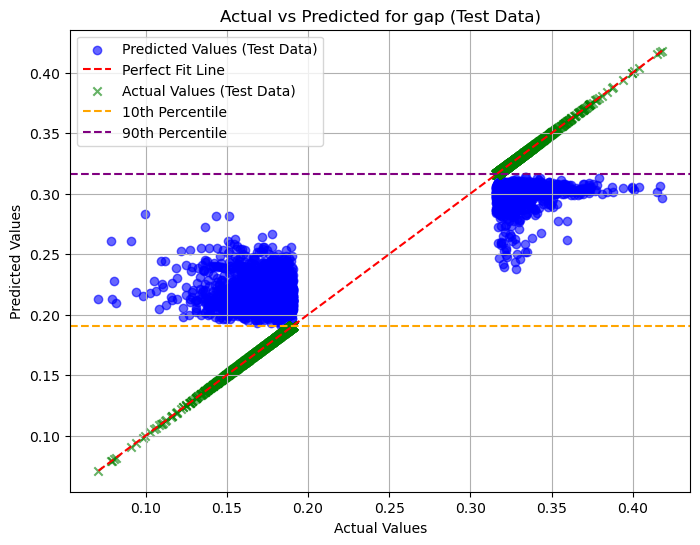

Model training and evaluation completed.


In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Descriptors, AllChem
from xgboost import XGBRegressor  # Import XGBoost Regressor
from sklearn.metrics import r2_score, mean_squared_error

# Load the data
data_path = "E:\\Dream\\Dream Research\\IDDD Project\\Work_December\\Data.xlsx"
data = pd.read_excel(data_path)

# Initialize a list to store molecular descriptors and fingerprints
features = []

# Function to compute molecular descriptors
def compute_descriptors(mol):
    descriptors = {
        'MolWt': Descriptors.MolWt(mol),
        'NumAtoms': mol.GetNumAtoms(),
        'NumBonds': mol.GetNumBonds(),
        'NumRotatableBonds': Descriptors.NumRotatableBonds(mol),
        'NumHAcceptors': Descriptors.NumHAcceptors(mol),
        'NumHDonors': Descriptors.NumHDonors(mol)
    }
    return descriptors

# Iterate through the dataset
for smiles in data['SMILES_1']:
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        descriptors = compute_descriptors(mol)
        # Compute Morgan fingerprint as a vector representation
        fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)
        fingerprint_array = list(fingerprint)
        # Combine descriptors and fingerprints
        features.append({**descriptors, **{'Fingerprint': fingerprint_array}})
    else:
        # Handle invalid SMILES strings
        features.append(None)

# Create a DataFrame for the features
features_df = pd.DataFrame(features)

# Extract fingerprint vectors and convert to a 2D array
fingerprint_vectors = np.array(features_df['Fingerprint'].tolist())

# Select the target property
target = 'gap'
Y = data[target]

# Calculate percentiles
q10, q90 = np.percentile(Y, [10, 90])

# Split data into training and testing sets based on percentiles
train_indices = (Y > q10) & (Y <= q90)
test_indices = (Y <= q10) | (Y > q90)

X_train = fingerprint_vectors[train_indices]
Y_train = Y[train_indices]
X_test = fingerprint_vectors[test_indices]
Y_test = Y[test_indices]

# Train an XGBoost Regressor
model = XGBRegressor(random_state=42, n_estimators=100, max_depth=6, learning_rate=0.1)
model.fit(X_train, Y_train)

# Predict on the test set
Y_test_pred = model.predict(X_test)

# Calculate metrics for test data
r2_test = r2_score(Y_test, Y_test_pred)
rmse_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))

print(f"Test R^2: {r2_test}")
print(f"Test RMSE: {rmse_test}")

# Plot Actual vs Predicted for test data
plt.figure(figsize=(8, 6))

# Scatter plot for predicted values vs actual values
plt.scatter(Y_test, Y_test_pred, alpha=0.6, label='Predicted Values (Test Data)', color='blue')

# Overlay line showing perfect predictions
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', color="red", label="Perfect Fit Line")

# Scatter plot for actual test data points
plt.scatter(Y_test, Y_test, alpha=0.6, label='Actual Values (Test Data)', color='green', marker='x')

# Highlighting actual test data range for clarity
plt.axhline(y=q10, color='orange', linestyle='--', label='10th Percentile')
plt.axhline(y=q90, color='purple', linestyle='--', label='90th Percentile')

plt.title(f"Actual vs Predicted for {target} (Test Data)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid()
plt.show()

print("Model training and evaluation completed.")

Epoch 1/50, Loss: 0.0221, Test R^2: -0.6084
Epoch 2/50, Loss: 0.0051, Test R^2: -0.1742
Epoch 3/50, Loss: 0.0098, Test R^2: 0.0725
Epoch 4/50, Loss: 0.0080, Test R^2: 0.3287
Epoch 5/50, Loss: 0.0036, Test R^2: 0.2565
Epoch 6/50, Loss: 0.0023, Test R^2: 0.0500
Epoch 7/50, Loss: 0.0029, Test R^2: -0.0577
Epoch 8/50, Loss: 0.0036, Test R^2: 0.0002
Epoch 9/50, Loss: 0.0035, Test R^2: 0.1760
Epoch 10/50, Loss: 0.0028, Test R^2: 0.3806
Epoch 11/50, Loss: 0.0020, Test R^2: 0.5271
Epoch 12/50, Loss: 0.0016, Test R^2: 0.5751
Epoch 13/50, Loss: 0.0018, Test R^2: 0.5586
Epoch 14/50, Loss: 0.0021, Test R^2: 0.5457
Epoch 15/50, Loss: 0.0022, Test R^2: 0.5533
Epoch 16/50, Loss: 0.0019, Test R^2: 0.5503
Epoch 17/50, Loss: 0.0014, Test R^2: 0.5117
Epoch 18/50, Loss: 0.0012, Test R^2: 0.4442
Epoch 19/50, Loss: 0.0012, Test R^2: 0.3743
Epoch 20/50, Loss: 0.0013, Test R^2: 0.3293
Epoch 21/50, Loss: 0.0014, Test R^2: 0.3239
Epoch 22/50, Loss: 0.0014, Test R^2: 0.3562
Epoch 23/50, Loss: 0.0013, Test R^2: 0

C:\Users\Priyanka\AppData\Local\Temp\ipykernel_2716\931396965.py:130: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', color="red", label="Perfect Fit Line")


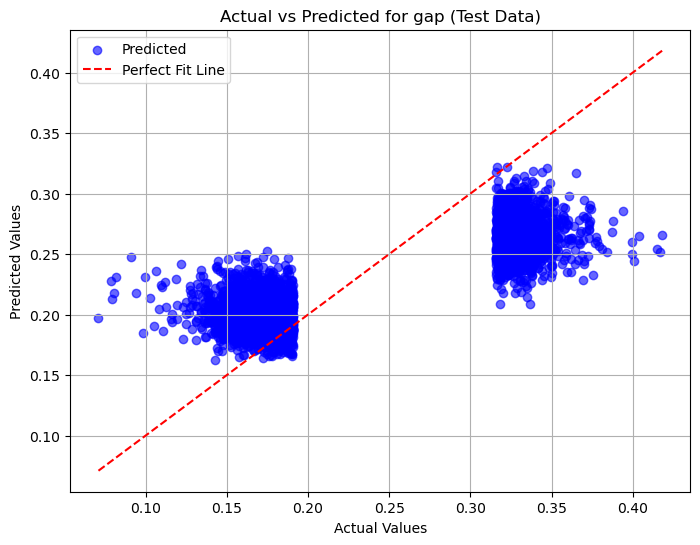

Final Test R^2: 0.5449
Final Test RMSE: 0.0545


In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Descriptors, AllChem
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim

# Load the data
data_path = "E:\\Dream\\Dream Research\\IDDD Project\\Work_December\\Data.xlsx"
data = pd.read_excel(data_path)

# Initialize a list to store molecular descriptors and fingerprints
features = []

# Function to compute molecular descriptors
def compute_descriptors(mol):
    descriptors = {
        'MolWt': Descriptors.MolWt(mol),
        'NumAtoms': mol.GetNumAtoms(),
        'NumBonds': mol.GetNumBonds(),
        'NumRotatableBonds': Descriptors.NumRotatableBonds(mol),
        'NumHAcceptors': Descriptors.NumHAcceptors(mol),
        'NumHDonors': Descriptors.NumHDonors(mol)
    }
    return descriptors

# Iterate through the dataset
for smiles in data['SMILES_1']:
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        descriptors = compute_descriptors(mol)
        # Compute Morgan fingerprint as a vector representation
        fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)
        fingerprint_array = list(fingerprint)
        # Combine descriptors and fingerprints
        features.append({**descriptors, **{'Fingerprint': fingerprint_array}})
    else:
        features.append(None)

# Create a DataFrame for the features
features_df = pd.DataFrame(features)

# Extract fingerprint vectors and convert to a 2D array
fingerprint_vectors = np.array(features_df['Fingerprint'].tolist())

# Select the target property
target = 'gap'
Y = data[target]

# Normalize features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(fingerprint_vectors)

# Calculate percentiles
q10, q90 = np.percentile(Y, [10, 90])

# Split data into training and testing sets based on percentiles
train_indices = (Y > q10) & (Y <= q90)
test_indices = (Y <= q10) | (Y > q90)

X_train = torch.tensor(X_normalized[train_indices], dtype=torch.float32)
Y_train = torch.tensor(Y[train_indices].values, dtype=torch.float32).unsqueeze(1)
X_test = torch.tensor(X_normalized[test_indices], dtype=torch.float32)
Y_test = torch.tensor(Y[test_indices].values, dtype=torch.float32).unsqueeze(1)

# Define the DNN Model
class DNN(nn.Module):
    def __init__(self, input_dim):
        super(DNN, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )
    
    def forward(self, x):
        return self.layers(x)

# Initialize the model
input_dim = X_train.shape[1]
model = DNN(input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

# Training the model
def train_model(model, criterion, optimizer, X_train, Y_train, X_test, Y_test, epochs=50):
    train_losses, test_r2_scores = [], []
    for epoch in range(epochs):
        # Training phase
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, Y_train)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())
        
        # Testing phase
        model.eval()
        with torch.no_grad():
            test_preds = model(X_test)
            r2 = r2_score(Y_test.numpy(), test_preds.numpy())
            test_r2_scores.append(r2)
        
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}, Test R^2: {r2:.4f}")
    
    return train_losses, test_r2_scores

# Train the model
train_losses, test_r2_scores = train_model(model, criterion, optimizer, X_train, Y_train, X_test, Y_test, epochs=50)

# Plot Actual vs Predicted for test data
model.eval()
with torch.no_grad():
    Y_test_pred = model(X_test).numpy()

plt.figure(figsize=(8, 6))
plt.scatter(Y_test.numpy(), Y_test_pred, alpha=0.6, label='Predicted', color='blue')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', color="red", label="Perfect Fit Line")
plt.title(f"Actual vs Predicted for {target} (Test Data)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid()
plt.show()

# Final metrics
r2_test = r2_score(Y_test.numpy(), Y_test_pred)
rmse_test = np.sqrt(mean_squared_error(Y_test.numpy(), Y_test_pred))
print(f"Final Test R^2: {r2_test:.4f}")
print(f"Final Test RMSE: {rmse_test:.4f}")


Epoch 1/100, Loss: 0.0047, Test R^2: 0.4375
Epoch 2/100, Loss: 0.0004, Test R^2: 0.5533
Epoch 3/100, Loss: 0.0003, Test R^2: 0.6316
Epoch 4/100, Loss: 0.0002, Test R^2: 0.6768
Epoch 5/100, Loss: 0.0002, Test R^2: 0.7078
Epoch 6/100, Loss: 0.0002, Test R^2: 0.7196
Epoch 7/100, Loss: 0.0001, Test R^2: 0.7424
Epoch 8/100, Loss: 0.0001, Test R^2: 0.7392
Epoch 9/100, Loss: 0.0001, Test R^2: 0.7465
Epoch 10/100, Loss: 0.0001, Test R^2: 0.7093
Epoch 11/100, Loss: 0.0001, Test R^2: 0.7637
Epoch 12/100, Loss: 0.0001, Test R^2: 0.7274
Epoch 13/100, Loss: 0.0001, Test R^2: 0.7749
Epoch 14/100, Loss: 0.0001, Test R^2: 0.7403
Epoch 15/100, Loss: 0.0001, Test R^2: 0.7585
Epoch 16/100, Loss: 0.0001, Test R^2: 0.7433
Epoch 17/100, Loss: 0.0001, Test R^2: 0.7664
Epoch 18/100, Loss: 0.0001, Test R^2: 0.7604
Epoch 19/100, Loss: 0.0001, Test R^2: 0.7454
Epoch 20/100, Loss: 0.0001, Test R^2: 0.7490
Epoch 21/100, Loss: 0.0001, Test R^2: 0.7702
Epoch 22/100, Loss: 0.0001, Test R^2: 0.7423
Epoch 23/100, Loss:

C:\Users\Priyanka\AppData\Local\Temp\ipykernel_2716\1609105648.py:159: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', color="red", label="Perfect Fit Line")


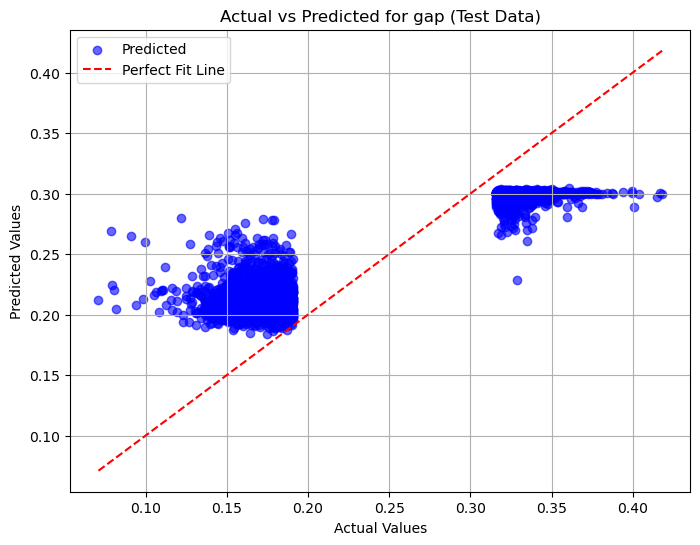

Final Test R^2: 0.7492
Final Test RMSE: 0.0405


In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Descriptors, AllChem
from sklearn.metrics import r2_score, mean_squared_error
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Load the data
data_path = "E:\\Dream\\Dream Research\\IDDD Project\\Work_December\\Data.xlsx"
data = pd.read_excel(data_path)

# Initialize a list to store molecular descriptors and fingerprints
features = []

# Function to compute molecular descriptors
def compute_descriptors(mol):
    descriptors = {
        'MolWt': Descriptors.MolWt(mol),
        'NumAtoms': mol.GetNumAtoms(),
        'NumBonds': mol.GetNumBonds(),
        'NumRotatableBonds': Descriptors.NumRotatableBonds(mol),
        'NumHAcceptors': Descriptors.NumHAcceptors(mol),
        'NumHDonors': Descriptors.NumHDonors(mol)
    }
    return descriptors

# Iterate through the dataset
for smiles in data['SMILES_1']:
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        descriptors = compute_descriptors(mol)
        # Compute Morgan fingerprint as a vector representation
        fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)
        fingerprint_array = list(fingerprint)
        # Combine descriptors and fingerprints
        features.append({**descriptors, **{'Fingerprint': fingerprint_array}})
    else:
        # Handle invalid SMILES strings
        features.append(None)

# Create a DataFrame for the features
features_df = pd.DataFrame(features)

# Extract fingerprint vectors and convert to a 2D array
fingerprint_vectors = np.array(features_df['Fingerprint'].tolist())

# Select the target property
target = 'gap'
Y = data[target]

# Calculate percentiles
q10, q90 = np.percentile(Y, [10, 90])

# Split data into training and testing sets based on percentiles
train_indices = (Y > q10) & (Y <= q90)
test_indices = (Y <= q10) | (Y > q90)

X_train = fingerprint_vectors[train_indices]
Y_train = Y[train_indices]
X_test = fingerprint_vectors[test_indices]
Y_test = Y[test_indices]

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
Y_train = torch.tensor(Y_train.values, dtype=torch.float32).view(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
Y_test = torch.tensor(Y_test.values, dtype=torch.float32).view(-1, 1)

# Create DataLoader for batches
train_data = TensorDataset(X_train, Y_train)
test_data = TensorDataset(X_test, Y_test)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

# Define the Enhanced DNN Model
class ComplexDNN(nn.Module):
    def __init__(self, input_dim):
        super(ComplexDNN, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 1)  # Output layer
        )
    
    def forward(self, x):
        return self.layers(x)

# Initialize the complex model
input_dim = X_train.shape[1]  # Number of features (fingerprint size)
model = ComplexDNN(input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-6)

# Training function
def train_model(model, criterion, optimizer, train_loader, test_loader, epochs=100):
    train_losses, test_r2_scores = [], []
    for epoch in range(epochs):
        # Training phase
        model.train()
        epoch_loss = 0
        for batch_idx, (inputs, targets) in enumerate(train_loader):
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        
        # Calculate R^2 for the test data
        model.eval()
        with torch.no_grad():
            test_preds = []
            test_targets = []
            for inputs, targets in test_loader:
                preds = model(inputs)
                test_preds.append(preds)
                test_targets.append(targets)
            
            test_preds = torch.cat(test_preds)
            test_targets = torch.cat(test_targets)
            r2 = r2_score(test_targets.numpy(), test_preds.numpy())
        
        print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss/len(train_loader):.4f}, Test R^2: {r2:.4f}")
        train_losses.append(epoch_loss / len(train_loader))
        test_r2_scores.append(r2)
    
    return train_losses, test_r2_scores

# Train the enhanced model
train_losses, test_r2_scores = train_model(model, criterion, optimizer, train_loader, test_loader, epochs=100)

# Plot Actual vs Predicted for test data
model.eval()
with torch.no_grad():
    Y_test_pred = model(X_test).numpy()

plt.figure(figsize=(8, 6))
plt.scatter(Y_test.numpy(), Y_test_pred, alpha=0.6, label='Predicted', color='blue')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', color="red", label="Perfect Fit Line")
plt.title(f"Actual vs Predicted for {target} (Test Data)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid()
plt.show()

# Final metrics
r2_test = r2_score(Y_test.numpy(), Y_test_pred)
rmse_test = np.sqrt(mean_squared_error(Y_test.numpy(), Y_test_pred))
print(f"Final Test R^2: {r2_test:.4f}")
print(f"Final Test RMSE: {rmse_test:.4f}")


Epoch 1/50, Loss: 0.1228, Test R^2: -9.3792
Epoch 2/50, Loss: 0.0697, Test R^2: -5.4159
Epoch 3/50, Loss: 0.0376, Test R^2: -2.6891
Epoch 4/50, Loss: 0.0172, Test R^2: -0.9210
Epoch 5/50, Loss: 0.0067, Test R^2: -0.2667
Epoch 6/50, Loss: 0.0074, Test R^2: -0.5118
Epoch 7/50, Loss: 0.0147, Test R^2: -0.7014
Epoch 8/50, Loss: 0.0172, Test R^2: -0.4684
Epoch 9/50, Loss: 0.0139, Test R^2: -0.0383
Epoch 10/50, Loss: 0.0089, Test R^2: 0.3173
Epoch 11/50, Loss: 0.0049, Test R^2: 0.4739
Epoch 12/50, Loss: 0.0032, Test R^2: 0.4468
Epoch 13/50, Loss: 0.0033, Test R^2: 0.3189
Epoch 14/50, Loss: 0.0043, Test R^2: 0.1776
Epoch 15/50, Loss: 0.0055, Test R^2: 0.0825
Epoch 16/50, Loss: 0.0063, Test R^2: 0.0611
Epoch 17/50, Loss: 0.0066, Test R^2: 0.1147
Epoch 18/50, Loss: 0.0064, Test R^2: 0.2265
Epoch 19/50, Loss: 0.0057, Test R^2: 0.3697
Epoch 20/50, Loss: 0.0048, Test R^2: 0.5130
Epoch 21/50, Loss: 0.0039, Test R^2: 0.6281
Epoch 22/50, Loss: 0.0031, Test R^2: 0.6957
Epoch 23/50, Loss: 0.0027, Test 

C:\Users\Priyanka\AppData\Local\Temp\ipykernel_2716\3230021022.py:132: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', color="red", label="Perfect Fit Line")


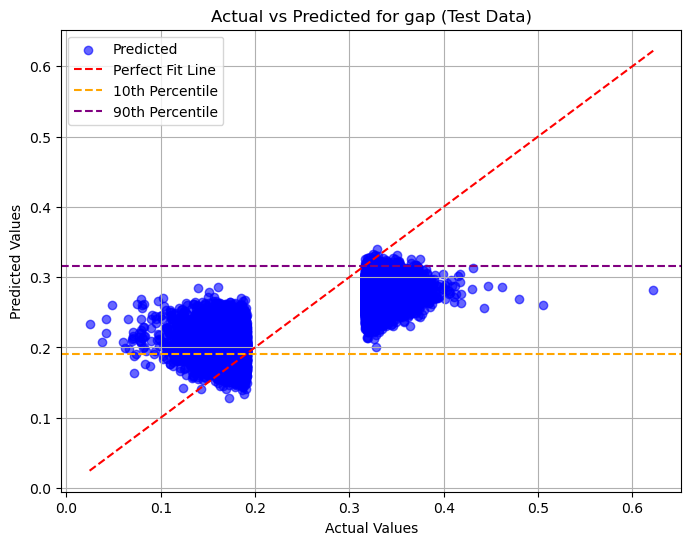

Final Test R^2: 0.6190
Final Test RMSE: 0.0499


In [7]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Descriptors, AllChem
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim

# Load the data
data_path = "E:\\Dream\\Dream Research\\IDDD Project\\Work_December\\entire_data.xlsx"
data = pd.read_excel(data_path)

# Initialize a list to store molecular descriptors and fingerprints
features = []

# Function to compute molecular descriptors
def compute_descriptors(mol):
    descriptors = {
        'MolWt': Descriptors.MolWt(mol),
        'NumAtoms': mol.GetNumAtoms(),
        'NumBonds': mol.GetNumBonds(),
        'NumRotatableBonds': Descriptors.NumRotatableBonds(mol),
        'NumHAcceptors': Descriptors.NumHAcceptors(mol),
        'NumHDonors': Descriptors.NumHDonors(mol)
    }
    return descriptors

# Iterate through the dataset
for smiles in data['SMILES_1']:
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        descriptors = compute_descriptors(mol)
        # Compute Morgan fingerprint as a vector representation
        fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)
        fingerprint_array = list(fingerprint)
        # Combine descriptors and fingerprints
        features.append({**descriptors, **{'Fingerprint': fingerprint_array}})
    else:
        features.append(None)

# Create a DataFrame for the features
features_df = pd.DataFrame(features)

# Extract fingerprint vectors and convert to a 2D array
fingerprint_vectors = np.array(features_df['Fingerprint'].tolist())

# Select the target property
target = 'gap'
Y = data[target]

# Normalize features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(fingerprint_vectors)

# Calculate percentiles
q10, q90 = np.percentile(Y, [10, 90])

# Split data into training and testing sets based on percentiles
train_indices = (Y > q10) & (Y <= q90)
test_indices = (Y <= q10) | (Y > q90)

X_train = torch.tensor(X_normalized[train_indices], dtype=torch.float32)
Y_train = torch.tensor(Y[train_indices].values, dtype=torch.float32).unsqueeze(1)
X_test = torch.tensor(X_normalized[test_indices], dtype=torch.float32)
Y_test = torch.tensor(Y[test_indices].values, dtype=torch.float32).unsqueeze(1)

# Define the DNN Model
class DNN(nn.Module):
    def __init__(self, input_dim):
        super(DNN, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )
    
    def forward(self, x):
        return self.layers(x)

# Initialize the model
input_dim = X_train.shape[1]
model = DNN(input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

# Training the model
def train_model(model, criterion, optimizer, X_train, Y_train, X_test, Y_test, epochs=50):
    train_losses, test_r2_scores = [], []
    for epoch in range(epochs):
        # Training phase
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, Y_train)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())
        
        # Testing phase
        model.eval()
        with torch.no_grad():
            test_preds = model(X_test)
            r2 = r2_score(Y_test.numpy(), test_preds.numpy())
            test_r2_scores.append(r2)
        
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}, Test R^2: {r2:.4f}")
    
    return train_losses, test_r2_scores

# Train the model
train_losses, test_r2_scores = train_model(model, criterion, optimizer, X_train, Y_train, X_test, Y_test, epochs=50)

# Plot Actual vs Predicted for test data
model.eval()
with torch.no_grad():
    Y_test_pred = model(X_test).numpy()



plt.figure(figsize=(8, 6))
plt.scatter(Y_test.numpy(), Y_test_pred, alpha=0.6, label='Predicted', color='blue')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', color="red", label="Perfect Fit Line")
# Highlighting actual test data range for clarity
plt.axhline(y=q10, color='orange', linestyle='--', label='10th Percentile')
plt.axhline(y=q90, color='purple', linestyle='--', label='90th Percentile')
plt.title(f"Actual vs Predicted for {target} (Test Data)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid()
plt.show()

# Final metrics
r2_test = r2_score(Y_test.numpy(), Y_test_pred)
rmse_test = np.sqrt(mean_squared_error(Y_test.numpy(), Y_test_pred))
print(f"Final Test R^2: {r2_test:.4f}")
print(f"Final Test RMSE: {rmse_test:.4f}")

Epoch 1/50, Loss: 0.1314, Test R^2: -12.4655
Epoch 2/50, Loss: 0.0732, Test R^2: -6.1240
Epoch 3/50, Loss: 0.0310, Test R^2: -1.8498
Epoch 4/50, Loss: 0.0103, Test R^2: -0.5561
Epoch 5/50, Loss: 0.0186, Test R^2: -0.8833
Epoch 6/50, Loss: 0.0288, Test R^2: -0.5297
Epoch 7/50, Loss: 0.0227, Test R^2: 0.0696
Epoch 8/50, Loss: 0.0125, Test R^2: 0.2844
Epoch 9/50, Loss: 0.0063, Test R^2: 0.0383
Epoch 10/50, Loss: 0.0055, Test R^2: -0.4181
Epoch 11/50, Loss: 0.0074, Test R^2: -0.8111
Epoch 12/50, Loss: 0.0098, Test R^2: -0.9868
Epoch 13/50, Loss: 0.0111, Test R^2: -0.9120
Epoch 14/50, Loss: 0.0111, Test R^2: -0.6358
Epoch 15/50, Loss: 0.0099, Test R^2: -0.2491
Epoch 16/50, Loss: 0.0080, Test R^2: 0.1428
Epoch 17/50, Loss: 0.0061, Test R^2: 0.4462
Epoch 18/50, Loss: 0.0049, Test R^2: 0.6076
Epoch 19/50, Loss: 0.0047, Test R^2: 0.6375
Epoch 20/50, Loss: 0.0053, Test R^2: 0.6023
Epoch 21/50, Loss: 0.0061, Test R^2: 0.5751
Epoch 22/50, Loss: 0.0064, Test R^2: 0.5806
Epoch 23/50, Loss: 0.0059, T

C:\Users\Priyanka\AppData\Local\Temp\ipykernel_2716\4116166880.py:132: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', color="red", label="Perfect Fit Line")


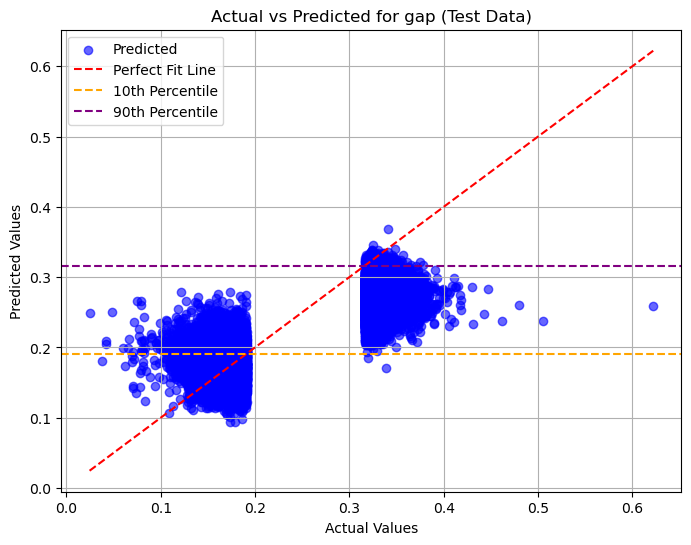

Final Test R^2: 0.6042
Final Test RMSE: 0.0509


In [9]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Descriptors, AllChem
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim

# Load the data
data_path = "E:\\Dream\\Dream Research\\IDDD Project\\Work_December\\entire_data.xlsx"
data = pd.read_excel(data_path)

# Initialize a list to store molecular descriptors and fingerprints
features = []

# Function to compute molecular descriptors
def compute_descriptors(mol):
    descriptors = {
        'MolWt': Descriptors.MolWt(mol),
        'NumAtoms': mol.GetNumAtoms(),
        'NumBonds': mol.GetNumBonds(),
        'NumRotatableBonds': Descriptors.NumRotatableBonds(mol),
        'NumHAcceptors': Descriptors.NumHAcceptors(mol),
        'NumHDonors': Descriptors.NumHDonors(mol)
    }
    return descriptors

# Iterate through the dataset
for smiles in data['SMILES_1']:
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        descriptors = compute_descriptors(mol)
        # Compute Morgan fingerprint as a vector representation
        fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)
        fingerprint_array = list(fingerprint)
        # Combine descriptors and fingerprints
        features.append({**descriptors, **{'Fingerprint': fingerprint_array}})
    else:
        features.append(None)

# Create a DataFrame for the features
features_df = pd.DataFrame(features)

# Extract fingerprint vectors and convert to a 2D array
fingerprint_vectors = np.array(features_df['Fingerprint'].tolist())

# Select the target property
target = 'gap'
Y = data[target]

# Normalize features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(fingerprint_vectors)

# Calculate percentiles
q10, q90 = np.percentile(Y, [10, 90])

# Split data into training and testing sets based on percentiles
train_indices = (Y > q10) & (Y <= q90)
test_indices = (Y <= q10) | (Y > q90)

X_train = torch.tensor(X_normalized[train_indices], dtype=torch.float32)
Y_train = torch.tensor(Y[train_indices].values, dtype=torch.float32).unsqueeze(1)
X_test = torch.tensor(X_normalized[test_indices], dtype=torch.float32)
Y_test = torch.tensor(Y[test_indices].values, dtype=torch.float32).unsqueeze(1)

# Define the DNN Model
class DNN(nn.Module):
    def __init__(self, input_dim):
        super(DNN, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )
    
    def forward(self, x):
        return self.layers(x)

# Initialize the model
input_dim = X_train.shape[1]
model = DNN(input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

# Training the model
def train_model(model, criterion, optimizer, X_train, Y_train, X_test, Y_test, epochs=20):
    train_losses, test_r2_scores = [], []
    for epoch in range(epochs):
        # Training phase
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, Y_train)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())
        
        # Testing phase
        model.eval()
        with torch.no_grad():
            test_preds = model(X_test)
            r2 = r2_score(Y_test.numpy(), test_preds.numpy())
            test_r2_scores.append(r2)
        
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}, Test R^2: {r2:.4f}")
    
    return train_losses, test_r2_scores

# Train the model
train_losses, test_r2_scores = train_model(model, criterion, optimizer, X_train, Y_train, X_test, Y_test, epochs=50)

# Plot Actual vs Predicted for test data
model.eval()
with torch.no_grad():
    Y_test_pred = model(X_test).numpy()



plt.figure(figsize=(8, 6))
plt.scatter(Y_test.numpy(), Y_test_pred, alpha=0.6, label='Predicted', color='blue')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', color="red", label="Perfect Fit Line")
# Highlighting actual test data range for clarity
plt.axhline(y=q10, color='orange', linestyle='--', label='10th Percentile')
plt.axhline(y=q90, color='purple', linestyle='--', label='90th Percentile')
plt.title(f"Actual vs Predicted for {target} (Test Data)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid()
plt.show()

# Final metrics
r2_test = r2_score(Y_test.numpy(), Y_test_pred)
rmse_test = np.sqrt(mean_squared_error(Y_test.numpy(), Y_test_pred))
print(f"Final Test R^2: {r2_test:.4f}")
print(f"Final Test RMSE: {rmse_test:.4f}")

Epoch 1/50, Loss: 170944.6562, Test R^2: -29.8451
Epoch 2/50, Loss: 170846.6406, Test R^2: -29.8301
Epoch 3/50, Loss: 170748.7500, Test R^2: -29.8138
Epoch 4/50, Loss: 170640.5625, Test R^2: -29.7947
Epoch 5/50, Loss: 170513.6094, Test R^2: -29.7717
Epoch 6/50, Loss: 170361.7344, Test R^2: -29.7439
Epoch 7/50, Loss: 170177.9219, Test R^2: -29.7104
Epoch 8/50, Loss: 169956.2188, Test R^2: -29.6704
Epoch 9/50, Loss: 169690.0781, Test R^2: -29.6228
Epoch 10/50, Loss: 169371.7969, Test R^2: -29.5664
Epoch 11/50, Loss: 168992.0781, Test R^2: -29.4998
Epoch 12/50, Loss: 168542.7188, Test R^2: -29.4216
Epoch 13/50, Loss: 168010.3438, Test R^2: -29.3301
Epoch 14/50, Loss: 167383.2344, Test R^2: -29.2233
Epoch 15/50, Loss: 166650.6562, Test R^2: -29.0993
Epoch 16/50, Loss: 165794.6719, Test R^2: -28.9560
Epoch 17/50, Loss: 164808.0156, Test R^2: -28.7910
Epoch 18/50, Loss: 163667.2969, Test R^2: -28.6021
Epoch 19/50, Loss: 162345.9688, Test R^2: -28.3865
Epoch 20/50, Loss: 160836.9844, Test R^2

C:\Users\Priyanka\AppData\Local\Temp\ipykernel_2716\1952494446.py:134: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', color="red", label="Perfect Fit Line")


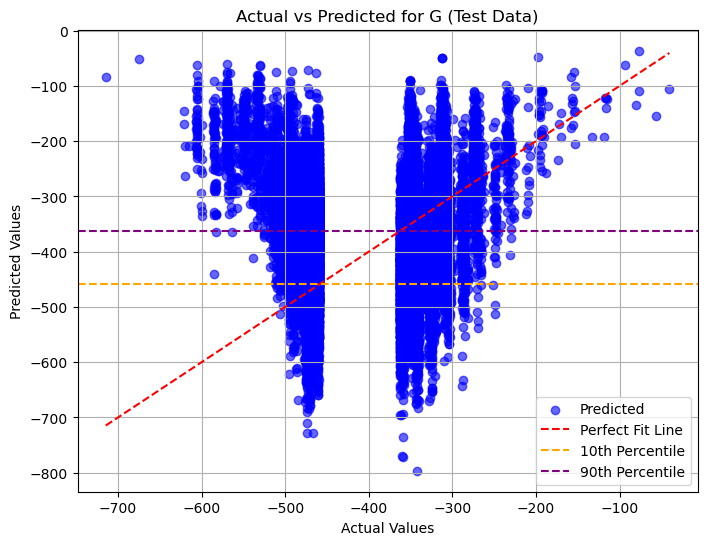

Final Test R^2: -1.9024
Final Test RMSE: 126.8951


In [10]:
# Trying for G

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Descriptors, AllChem
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim

# Load the data
data_path = "E:\\Dream\\Dream Research\\IDDD Project\\Work_December\\entire_data.xlsx"
data = pd.read_excel(data_path)

# Initialize a list to store molecular descriptors and fingerprints
features = []

# Function to compute molecular descriptors
def compute_descriptors(mol):
    descriptors = {
        'MolWt': Descriptors.MolWt(mol),
        'NumAtoms': mol.GetNumAtoms(),
        'NumBonds': mol.GetNumBonds(),
        'NumRotatableBonds': Descriptors.NumRotatableBonds(mol),
        'NumHAcceptors': Descriptors.NumHAcceptors(mol),
        'NumHDonors': Descriptors.NumHDonors(mol)
    }
    return descriptors

# Iterate through the dataset
for smiles in data['SMILES_1']:
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        descriptors = compute_descriptors(mol)
        # Compute Morgan fingerprint as a vector representation
        fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)
        fingerprint_array = list(fingerprint)
        # Combine descriptors and fingerprints
        features.append({**descriptors, **{'Fingerprint': fingerprint_array}})
    else:
        features.append(None)

# Create a DataFrame for the features
features_df = pd.DataFrame(features)

# Extract fingerprint vectors and convert to a 2D array
fingerprint_vectors = np.array(features_df['Fingerprint'].tolist())

# Select the target property
target = 'G'
Y = data[target]

# Normalize features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(fingerprint_vectors)

# Calculate percentiles
q10, q90 = np.percentile(Y, [10, 90])

# Split data into training and testing sets based on percentiles
train_indices = (Y > q10) & (Y <= q90)
test_indices = (Y <= q10) | (Y > q90)

X_train = torch.tensor(X_normalized[train_indices], dtype=torch.float32)
Y_train = torch.tensor(Y[train_indices].values, dtype=torch.float32).unsqueeze(1)
X_test = torch.tensor(X_normalized[test_indices], dtype=torch.float32)
Y_test = torch.tensor(Y[test_indices].values, dtype=torch.float32).unsqueeze(1)

# Define the DNN Model
class DNN(nn.Module):
    def __init__(self, input_dim):
        super(DNN, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )
    
    def forward(self, x):
        return self.layers(x)

# Initialize the model
input_dim = X_train.shape[1]
model = DNN(input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

# Training the model
def train_model(model, criterion, optimizer, X_train, Y_train, X_test, Y_test, epochs=20):
    train_losses, test_r2_scores = [], []
    for epoch in range(epochs):
        # Training phase
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, Y_train)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())
        
        # Testing phase
        model.eval()
        with torch.no_grad():
            test_preds = model(X_test)
            r2 = r2_score(Y_test.numpy(), test_preds.numpy())
            test_r2_scores.append(r2)
        
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}, Test R^2: {r2:.4f}")
    
    return train_losses, test_r2_scores

# Train the model
train_losses, test_r2_scores = train_model(model, criterion, optimizer, X_train, Y_train, X_test, Y_test, epochs=50)

# Plot Actual vs Predicted for test data
model.eval()
with torch.no_grad():
    Y_test_pred = model(X_test).numpy()



plt.figure(figsize=(8, 6))
plt.scatter(Y_test.numpy(), Y_test_pred, alpha=0.6, label='Predicted', color='blue')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', color="red", label="Perfect Fit Line")
# Highlighting actual test data range for clarity
plt.axhline(y=q10, color='orange', linestyle='--', label='10th Percentile')
plt.axhline(y=q90, color='purple', linestyle='--', label='90th Percentile')
plt.title(f"Actual vs Predicted for {target} (Test Data)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid()
plt.show()

# Final metrics
r2_test = r2_score(Y_test.numpy(), Y_test_pred)
rmse_test = np.sqrt(mean_squared_error(Y_test.numpy(), Y_test_pred))
print(f"Final Test R^2: {r2_test:.4f}")
print(f"Final Test RMSE: {rmse_test:.4f}")

Epoch 1/100, Loss: 0.0006, Test R^2: 0.7191
Epoch 2/100, Loss: 0.0002, Test R^2: 0.7553
Epoch 3/100, Loss: 0.0002, Test R^2: 0.7196
Epoch 4/100, Loss: 0.0001, Test R^2: 0.7661
Epoch 5/100, Loss: 0.0001, Test R^2: 0.7549
Epoch 6/100, Loss: 0.0001, Test R^2: 0.7605
Epoch 7/100, Loss: 0.0001, Test R^2: 0.7526
Epoch 8/100, Loss: 0.0001, Test R^2: 0.7338
Epoch 9/100, Loss: 0.0001, Test R^2: 0.7665
Epoch 10/100, Loss: 0.0001, Test R^2: 0.7633
Epoch 11/100, Loss: 0.0001, Test R^2: 0.7351
Epoch 12/100, Loss: 0.0001, Test R^2: 0.7270
Epoch 13/100, Loss: 0.0001, Test R^2: 0.7658
Epoch 14/100, Loss: 0.0001, Test R^2: 0.7717
Epoch 15/100, Loss: 0.0001, Test R^2: 0.7579
Epoch 16/100, Loss: 0.0001, Test R^2: 0.7606
Epoch 17/100, Loss: 0.0001, Test R^2: 0.7743
Epoch 18/100, Loss: 0.0001, Test R^2: 0.7405
Epoch 19/100, Loss: 0.0001, Test R^2: 0.7726
Epoch 20/100, Loss: 0.0001, Test R^2: 0.7483
Epoch 21/100, Loss: 0.0001, Test R^2: 0.7788
Epoch 22/100, Loss: 0.0001, Test R^2: 0.7734
Epoch 23/100, Loss:

C:\Users\Priyanka\AppData\Local\Temp\ipykernel_2716\3160409804.py:159: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', color="red", label="Perfect Fit Line")


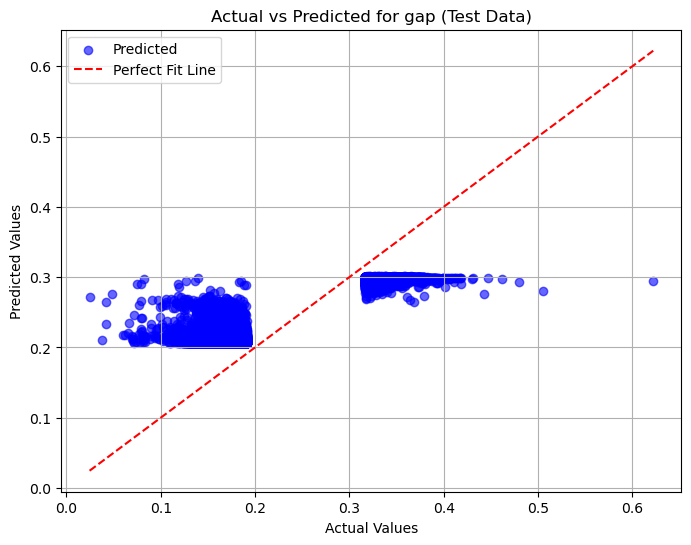

Final Test R^2: 0.7395
Final Test RMSE: 0.0413


In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Descriptors, AllChem
from sklearn.metrics import r2_score, mean_squared_error
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Load the data
data_path = "E:\\Dream\\Dream Research\\IDDD Project\\Work_December\\entire_data.xlsx"
data = pd.read_excel(data_path)

# Initialize a list to store molecular descriptors and fingerprints
features = []

# Function to compute molecular descriptors
def compute_descriptors(mol):
    descriptors = {
        'MolWt': Descriptors.MolWt(mol),
        'NumAtoms': mol.GetNumAtoms(),
        'NumBonds': mol.GetNumBonds(),
        'NumRotatableBonds': Descriptors.NumRotatableBonds(mol),
        'NumHAcceptors': Descriptors.NumHAcceptors(mol),
        'NumHDonors': Descriptors.NumHDonors(mol)
    }
    return descriptors

# Iterate through the dataset
for smiles in data['SMILES_1']:
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        descriptors = compute_descriptors(mol)
        # Compute Morgan fingerprint as a vector representation
        fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)
        fingerprint_array = list(fingerprint)
        # Combine descriptors and fingerprints
        features.append({**descriptors, **{'Fingerprint': fingerprint_array}})
    else:
        # Handle invalid SMILES strings
        features.append(None)

# Create a DataFrame for the features
features_df = pd.DataFrame(features)

# Extract fingerprint vectors and convert to a 2D array
fingerprint_vectors = np.array(features_df['Fingerprint'].tolist())

# Select the target property
target = 'gap'
Y = data[target]

# Calculate percentiles
q10, q90 = np.percentile(Y, [10, 90])

# Split data into training and testing sets based on percentiles
train_indices = (Y > q10) & (Y <= q90)
test_indices = (Y <= q10) | (Y > q90)

X_train = fingerprint_vectors[train_indices]
Y_train = Y[train_indices]
X_test = fingerprint_vectors[test_indices]
Y_test = Y[test_indices]

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
Y_train = torch.tensor(Y_train.values, dtype=torch.float32).view(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
Y_test = torch.tensor(Y_test.values, dtype=torch.float32).view(-1, 1)

# Create DataLoader for batches
train_data = TensorDataset(X_train, Y_train)
test_data = TensorDataset(X_test, Y_test)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

# Define the Enhanced DNN Model
class ComplexDNN(nn.Module):
    def __init__(self, input_dim):
        super(ComplexDNN, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 1)  # Output layer
        )
    
    def forward(self, x):
        return self.layers(x)

# Initialize the complex model
input_dim = X_train.shape[1]  # Number of features (fingerprint size)
model = ComplexDNN(input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-6)

# Training function
def train_model(model, criterion, optimizer, train_loader, test_loader, epochs=100):
    train_losses, test_r2_scores = [], []
    for epoch in range(epochs):
        # Training phase
        model.train()
        epoch_loss = 0
        for batch_idx, (inputs, targets) in enumerate(train_loader):
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        
        # Calculate R^2 for the test data
        model.eval()
        with torch.no_grad():
            test_preds = []
            test_targets = []
            for inputs, targets in test_loader:
                preds = model(inputs)
                test_preds.append(preds)
                test_targets.append(targets)
            
            test_preds = torch.cat(test_preds)
            test_targets = torch.cat(test_targets)
            r2 = r2_score(test_targets.numpy(), test_preds.numpy())
        
        print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss/len(train_loader):.4f}, Test R^2: {r2:.4f}")
        train_losses.append(epoch_loss / len(train_loader))
        test_r2_scores.append(r2)
    
    return train_losses, test_r2_scores

# Train the enhanced model
train_losses, test_r2_scores = train_model(model, criterion, optimizer, train_loader, test_loader, epochs=100)

# Plot Actual vs Predicted for test data
model.eval()
with torch.no_grad():
    Y_test_pred = model(X_test).numpy()

plt.figure(figsize=(8, 6))
plt.scatter(Y_test.numpy(), Y_test_pred, alpha=0.6, label='Predicted', color='blue')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', color="red", label="Perfect Fit Line")
plt.title(f"Actual vs Predicted for {target} (Test Data)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid()
plt.show()

# Final metrics
r2_test = r2_score(Y_test.numpy(), Y_test_pred)
rmse_test = np.sqrt(mean_squared_error(Y_test.numpy(), Y_test_pred))
print(f"Final Test R^2: {r2_test:.4f}")
print(f"Final Test RMSE: {rmse_test:.4f}")

C:\Users\Priyanka\anaconda3\lib\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1/8, Loss: 0.0006, Test R^2: 0.7477
Epoch 2/8, Loss: 0.0002, Test R^2: 0.7963
Epoch 3/8, Loss: 0.0001, Test R^2: 0.8046
Epoch 4/8, Loss: 0.0001, Test R^2: 0.7890
Epoch 5/8, Loss: 0.0001, Test R^2: 0.8150
Epoch 6/8, Loss: 0.0001, Test R^2: 0.7810
Epoch 7/8, Loss: 0.0001, Test R^2: 0.8091
Epoch 8/8, Loss: 0.0001, Test R^2: 0.7970


C:\Users\Priyanka\AppData\Local\Temp\ipykernel_46360\2587316527.py:149: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', color="red", label="Perfect Fit Line")


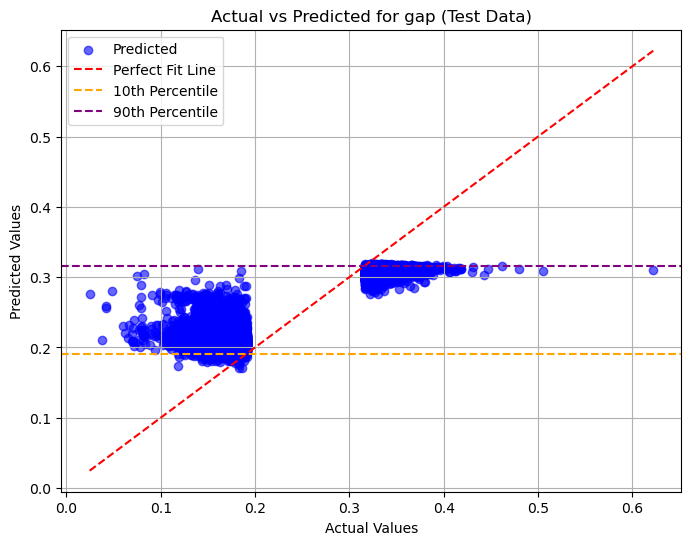

Final Test R^2: 0.7970
Final Test RMSE: 0.0365


In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Descriptors, AllChem
from sklearn.metrics import r2_score, mean_squared_error
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Load the data
data_path = "E:\\Dream\\Dream Research\\IDDD Project\\Work_December\\entire_data.xlsx"
data = pd.read_excel(data_path)

# Initialize a list to store molecular descriptors and fingerprints
features = []

# Function to compute molecular descriptors
def compute_descriptors(mol):
    descriptors = {
        'MolWt': Descriptors.MolWt(mol),
        'NumAtoms': mol.GetNumAtoms(),
        'NumBonds': mol.GetNumBonds(),
        'NumRotatableBonds': Descriptors.NumRotatableBonds(mol),
        'NumHAcceptors': Descriptors.NumHAcceptors(mol),
        'NumHDonors': Descriptors.NumHDonors(mol)
    }
    return descriptors

# Iterate through the dataset
for smiles in data['SMILES_1']:
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        descriptors = compute_descriptors(mol)
        # Compute Morgan fingerprint as a vector representation
        fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)
        fingerprint_array = list(fingerprint)
        # Combine descriptors and fingerprints
        features.append({**descriptors, **{'Fingerprint': fingerprint_array}})
    else:
        # Handle invalid SMILES strings
        features.append(None)

# Create a DataFrame for the features
features_df = pd.DataFrame(features)

# Extract fingerprint vectors and convert to a 2D array
fingerprint_vectors = np.array(features_df['Fingerprint'].tolist())

# Select the target property
target = 'gap'
Y = data[target]

# Calculate percentiles
q10, q90 = np.percentile(Y, [10, 90])

# Split data into training and testing sets based on percentiles
train_indices = (Y > q10) & (Y <= q90)
test_indices = (Y <= q10) | (Y > q90)

X_train = fingerprint_vectors[train_indices]
Y_train = Y[train_indices]
X_test = fingerprint_vectors[test_indices]
Y_test = Y[test_indices]

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
Y_train = torch.tensor(Y_train.values, dtype=torch.float32).view(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
Y_test = torch.tensor(Y_test.values, dtype=torch.float32).view(-1, 1)

# Create DataLoader for batches
train_data = TensorDataset(X_train, Y_train)
test_data = TensorDataset(X_test, Y_test)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

# Define the Transformer Model
class TransformerRegressor(nn.Module):
    def __init__(self, input_dim, embed_dim=128, num_heads=4, ff_dim=256, num_layers=3):
        super(TransformerRegressor, self).__init__()
        self.embedding = nn.Linear(input_dim, embed_dim)
        transformer_layer = nn.TransformerEncoderLayer(d_model=embed_dim, nhead=num_heads, dim_feedforward=ff_dim)
        self.transformer = nn.TransformerEncoder(transformer_layer, num_layers=num_layers)
        self.fc = nn.Sequential(
            nn.Linear(embed_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )
    
    def forward(self, x):
        x = self.embedding(x).unsqueeze(1)  # Add sequence dimension
        x = self.transformer(x)
        x = x.mean(dim=1)  # Global average pooling
        return self.fc(x)

# Initialize the Transformer model
input_dim = X_train.shape[1]  # Number of features (fingerprint size)
model = TransformerRegressor(input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-6)

# Training function
def train_model(model, criterion, optimizer, train_loader, test_loader, epochs=50):
    train_losses, test_r2_scores = [], []
    for epoch in range(epochs):
        # Training phase
        model.train()
        epoch_loss = 0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        
        # Calculate R^2 for the test data
        model.eval()
        with torch.no_grad():
            test_preds, test_targets = [], []
            for inputs, targets in test_loader:
                preds = model(inputs)
                test_preds.append(preds)
                test_targets.append(targets)
            
            test_preds = torch.cat(test_preds)
            test_targets = torch.cat(test_targets)
            r2 = r2_score(test_targets.numpy(), test_preds.numpy())
        
        print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss/len(train_loader):.4f}, Test R^2: {r2:.4f}")
        train_losses.append(epoch_loss / len(train_loader))
        test_r2_scores.append(r2)
    
    return train_losses, test_r2_scores

# Train the Transformer model
train_losses, test_r2_scores = train_model(model, criterion, optimizer, train_loader, test_loader, epochs=8)

# Plot Actual vs Predicted for test data
model.eval()
with torch.no_grad():
    Y_test_pred = model(X_test).numpy()

plt.figure(figsize=(8, 6))
plt.scatter(Y_test.numpy(), Y_test_pred, alpha=0.6, label='Predicted', color='blue')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', color="red", label="Perfect Fit Line")
# Highlighting actual test data range for clarity
plt.axhline(y=q10, color='orange', linestyle='--', label='10th Percentile')
plt.axhline(y=q90, color='purple', linestyle='--', label='90th Percentile')
plt.title(f"Actual vs Predicted for {target} (Test Data)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid()
plt.show()

# Final metrics
r2_test = r2_score(Y_test.numpy(), Y_test_pred)
rmse_test = np.sqrt(mean_squared_error(Y_test.numpy(), Y_test_pred))
print(f"Final Test R^2: {r2_test:.4f}")
print(f"Final Test RMSE: {rmse_test:.4f}")


C:\Users\Priyanka\AppData\Local\Temp\ipykernel_46360\412889949.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', color='black', label='Perfect Fit Line')


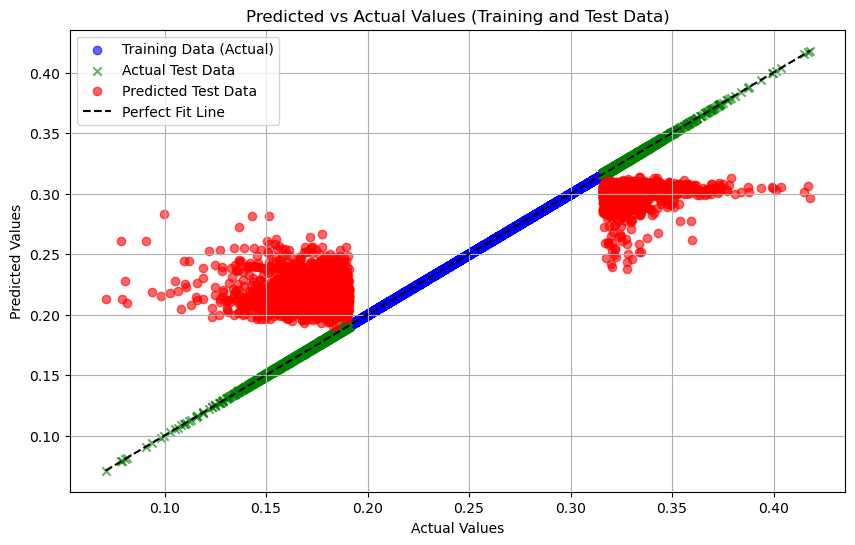

In [6]:
# Plot Predicted vs Actual Values for Training and Test Data
plt.figure(figsize=(10, 6))

# Plot training data (actual = predicted for training data)
plt.scatter(Y_train, Y_train, alpha=0.6, label='Training Data (Actual)', color='blue')

# Plot actual test data points
plt.scatter(Y_test, Y_test, alpha=0.6, label='Actual Test Data', color='green', marker='x')

# Plot predicted test data points
plt.scatter(Y_test, Y_test_pred, alpha=0.6, label='Predicted Test Data', color='red')

# Plot diagonal line for perfect predictions
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', color='black', label='Perfect Fit Line')

# Add plot details
plt.title("Predicted vs Actual Values (Training and Test Data)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Descriptors, AllChem
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor  # Import XGBoost Regressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Load the data
#current_directory = os.getcwd()
data_path = "E:/Dream/Dream Research/IDDD Project/Work_December/Data.xlsx"
data = pd.read_excel(data_path)

# Initialize a list to store molecular descriptors and fingerprints
features = []

# Function to compute molecular descriptors
def compute_descriptors(mol):
    descriptors = {
        'MolWt': Descriptors.MolWt(mol),
        'NumAtoms': mol.GetNumAtoms(),
        'NumBonds': mol.GetNumBonds(),
        'NumRotatableBonds': Descriptors.NumRotatableBonds(mol),
        'NumHAcceptors': Descriptors.NumHAcceptors(mol),
        'NumHDonors': Descriptors.NumHDonors(mol)
    }
    return descriptors

# Iterate through the dataset
for smiles in data['SMILES_1']:
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        descriptors = compute_descriptors(mol)
        # Compute Morgan fingerprint as a vector representation
        fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)
        fingerprint_array = list(fingerprint)
        # Combine descriptors and fingerprints
        features.append({**descriptors, **{'Fingerprint': fingerprint_array}})
    else:
        # Handle invalid SMILES strings
        features.append(None)

# Create a DataFrame for the features
features_df = pd.DataFrame(features)

# Extract fingerprint vectors and convert to a 2D array
fingerprint_vectors = np.array(features_df['Fingerprint'].tolist())

# Initialize a dictionary to store metrics
results = {}

# Iterate through each target property to predict
for target in ['gap']:
    # Select the target property and prepare the dataset
    Y = data[target]

    # Split the data into training and testing sets
    X_train, X_test, Y_train, Y_test = train_test_split(fingerprint_vectors, Y, test_size=0.2, random_state=42)

    # Set up the model and hyperparameter grid
    model = XGBRegressor(random_state=42)
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [3, 6, 9],
        'learning_rate': [0.01, 0.05, 0.1],
        'subsample': [0.7, 0.8, 1.0],
        'colsample_bytree': [0.7, 0.8, 1.0]
    }

    # Perform grid search for hyperparameter tuning
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=1, n_jobs=-1)
    grid_search.fit(X_train, Y_train)

    # Best model after tuning
    best_model = grid_search.best_estimator_

    # Predict on both train and test sets
    Y_train_pred = best_model.predict(X_train)
    Y_test_pred = best_model.predict(X_test)

    # Calculate metrics for the test set
    r2_train = r2_score(Y_train, Y_train_pred)
    r2_test = r2_score(Y_test, Y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
    mae_train = mean_absolute_error(Y_train, Y_train_pred)
    mae_test = mean_absolute_error(Y_test, Y_test_pred)

    results[target] = {
        "Train R^2": r2_train, "Test R^2": r2_test,
        "Train RMSE": rmse_train, "Test RMSE": rmse_test,
        "Train MAE": mae_train, "Test MAE": mae_test
    }

    print(f"{target} - Train R^2: {r2_train}, Test R^2: {r2_test}")
    print(f"Train RMSE: {rmse_train}, Test RMSE: {rmse_test}")
    print(f"Train MAE: {mae_train}, Test MAE: {mae_test}")

    # Plot for train predictions
    plt.figure(figsize=(8, 6))
    plt.scatter(Y_train, Y_train_pred, alpha=0.6)
    plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'k--', color="red")
    plt.title(f"Train Actual vs Predicted for {target}")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.grid()
    plt.show()

    # Plot for test predictions
    plt.figure(figsize=(8, 6))
    plt.scatter(Y_test, Y_test_pred, alpha=0.6)
    plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', color="red")
    plt.title(f"Test Actual vs Predicted for {target}")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.grid()
    plt.show()


Fitting 3 folds for each of 162 candidates, totalling 486 fits
